# Project Description

# Overview

Introduction:

This capstone project involves analyzing the Zomato dataset, which contains information about various restaurants across different cities in the world. The dataset provides details such as restaurant names, location, cuisines, cost, ratings, and other relevant information.

The goal of the analysis is to predict two key variables: average cost for two people and price range. By understanding these factors, users can find the best value-for-money restaurants within their budget and explore different cuisines in different localities. Additionally, the analysis aims to identify the localities with the maximum number of restaurants serving the best cuisines of a country.

In [1]:
# Importing Necessary Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import joblib
pd.set_option('display.max_columns', None)

# Importing Datasets

Dataset Description:

The datasets which is used in this project to perform the tasks can be accessed from the following links:
https://github.com/dsrscientist/dataset4/blob/main/zomato.csv
https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx

Column Description:

1. Restaurant Id: Unique ID of each restaurant across various cities.

2. Restaurant Name: Name of the restaurant.

3. Country Code: Country code where the restaurant is located.

4. City: City where the restaurant is located.

5. Address: Address of the restaurant.

6. Locality: Locality or neighborhood of the restaurant.

7. Locality Verbose: Detailed description of the locality.

8. Longitude: Longitude coordinate of the restaurant's location.

9. Latitude: Latitude coordinate of the restaurant's location.

10. Cuisines: Cuisines offered by the restaurant.

11. Average Cost for Two: Cost for two people in different currencies.

12. Currency: Currency of the country.

13. Has Table Booking: Indicates if the restaurant has the option for table booking (yes/no).

14. Has Online Delivery: Indicates if the restaurant offers online delivery (yes/no).

15. Is Delivering: Indicates if the restaurant is currently delivering (yes/no).

16. Switch to Order Menu: Indicates if there is an option to switch to the ordering menu (yes/no).

17. Price Range: Range of price of food.

18. Aggregate Rating: Average rating out of 5.

19. Rating Color: Color representation based on the average rating.

20. Rating Text: Textual representation of the rating (e.g., Good, Excellent).

21. Votes: Number of ratings casted by people.

These descriptions provide an overview of each column in the Zomato dataset and the information it represents.


In [2]:
df1= pd.read_csv("zomato.csv")
df2= pd.read_csv("country_code.csv")
df= pd.merge(df1, df2, on= 'Country Code')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [3]:
df= df.drop(["Restaurant ID", "Address", "Longitude", "Latitude", "Locality Verbose", "Switch to order menu"], axis= 1)

In [4]:
df.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [5]:
df.tail()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,Naml۱ Gurme,208,��stanbul,Karak�_y,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,Walter's Coffee Roastery,208,��stanbul,Moda,Cafe,55,Turkish Lira(TL),No,No,No,2,4.0,Green,Very Good,591,Turkey


# Exploratory Data Analysis(EDA)

It is an approach to analyze the datasets, and summarize their characteristics. Here we are analyzing dataset by first checking with the dimensions of the dataset, then checking for the null values present in the dataset, followed by the memory usage detail by using info() function, checking with value counts and unique values present in dataset, followed by statistical summary of dataset(numerical column), which ends with graphical analysis.

Let's start with checking the dimension of the dataset using df.shape attribute, then we will be seeing df.columns and df.dtypes attributes to check the columns and their datatypes, which will be followed by isnull().sum() function which will check the missing data present in each column of the dataset. We will also visualize the null values using heatmap to clear the confusion. And then we will be describing the statistical summary by using df.describe() function.

In [6]:
df.shape

(9551, 16)

In [7]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [8]:
df.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Locality                 object
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

As we can see there is three different types of dtypes are present in the datase i.e., int64(4), float64(1), object(11).

In [9]:
# Check the NaN values present in each columns

df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Let's use fillna() to fill missing values.

In [10]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace= True)

df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

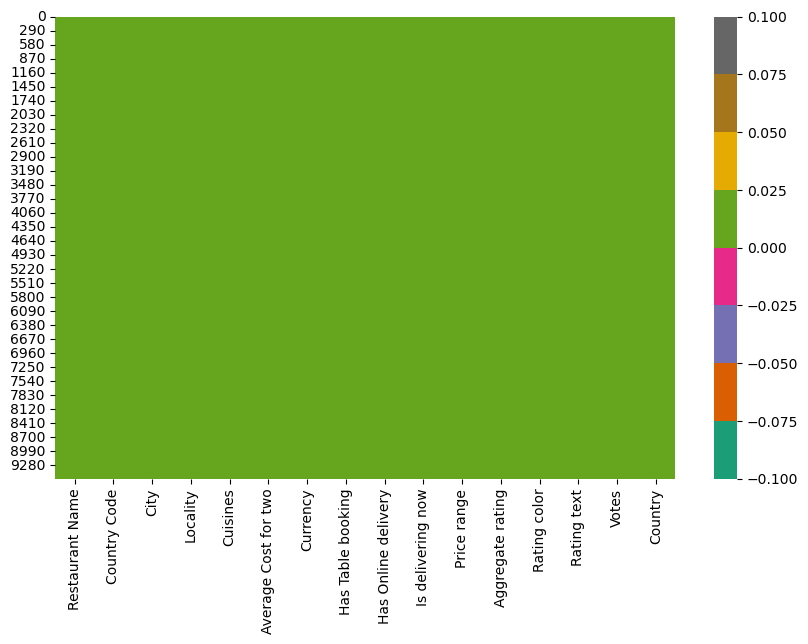

In [11]:
# Now visualize NaN values by using heatmap

plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(), cmap = 'Dark2')
plt.show()

As we can visualize that there is no null values present now.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Cuisines              9551 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   object 
 7   Has Table booking     9551 non-null   object 
 8   Has Online delivery   9551 non-null   object 
 9   Is delivering now     9551 non-null   object 
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   object 
 13  Rating text           9551 non-null   object 
 14  Votes                 9551 non-null   int64  
 15  Country              

In [13]:
# Let's looping through each column to get value counts

for col in df.columns:
    print("Value counts for{col}:")
    print(df[col].value_counts())

Value counts for{col}:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
Value counts for{col}:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
Value counts for{col}:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64
Value counts for{col}:
Connaught Place                    

In [14]:
# loop through each column to get unique values
for col in df.columns:
    print("Unique values in {col}:")
    print(df[col].unique())

Unique values in {col}:
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]
Unique values in {col}:
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
Unique values in {col}:
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Athens' 'Augusta' 'Boise'
 'Cedar Rapids/Iowa City' 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton'
 'Davenport' 'Des Moines' 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview'
 'Lincoln' 'Macon' 'Mc Millan' 'Miller' 'Monroe' 'Ojo Caliente' 'Orlando'
 'Pensacola' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay' 'Armidale' 'Balingup' 'Beechworth' 'Dicky Beach'
 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs' 'Huskisson'
 'Inverloch' 'Lakes Entrance' 'Lorn' 'Mace

# Description of Data

In [15]:
# Statiscal Summary of Numerical columns

df.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


This statistical summary of numerical columns include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable.

These statistics will be providing an overview of the distribution and range of values for each numerical feature in your dataset. They will be useful for understanding the central tendency, spread, and potential outliers in the data.

# Data Visualization - Graphical Analysis

Here we will be performing data visualization techniques like Univariate, Bivariate , and Multivariate analysis to visually explore and analyze the data. It will helps us in gaining the insights into the patterns,distribution, and relatioship present in dataset. For plotting different graphs we wil be import seaborn and matplotlib Python libraries. By creating various plots, we can easly visualize the data.

Univariate Analysis:

Here, to perform univariate analysis in numerical column we will be using Density plot,and boxplot. Using a bar plot to each categorical column and will see the distribution, skewness and presence of outliers in the data present in each columns.

 Numerical Columns

1. 'Country Code'

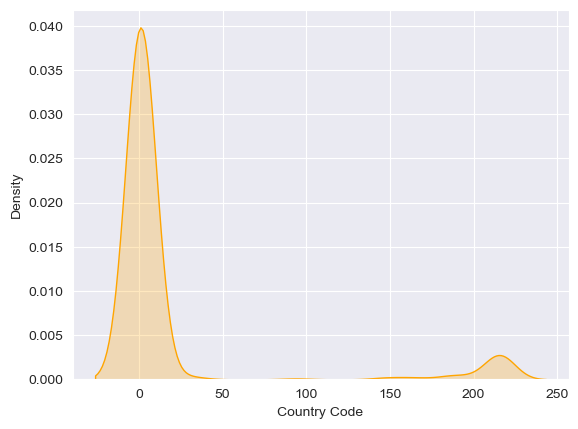

In [16]:
# Now let's analyze the 'Country Code' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Country Code"], shade=True, color='orange')
plt.show()

Here we can see distribution is highly right skewed.

2. 'Average Cost for two'

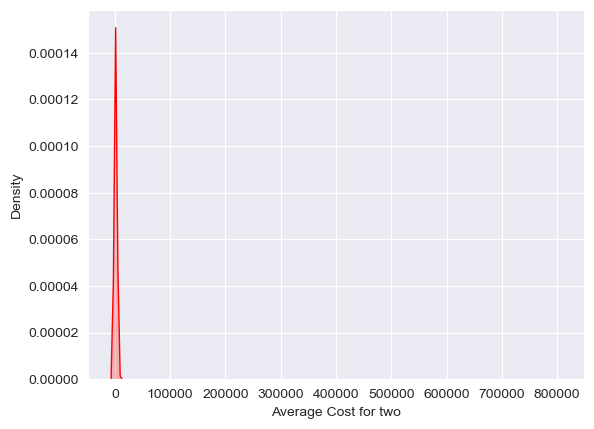

In [17]:
# Now let's analyze the 'Average Cost for two' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Average Cost for two"], shade=True, color='red')
plt.show()

Here we can see distribution is highly skewed to right.

3. 'Price Range'

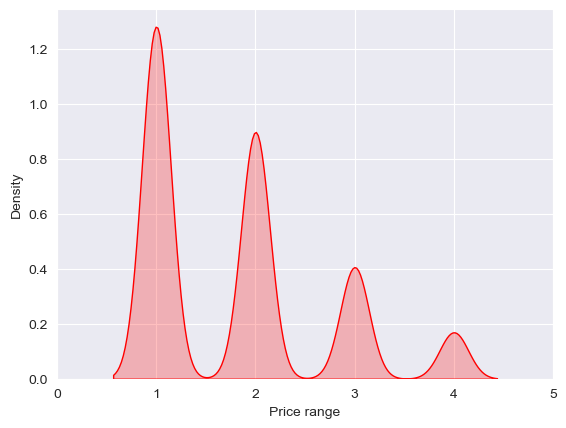

In [18]:
# Now let's analyze the 'Price Range' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Price range"], shade=True, color='red')
plt.xlim(0,5)
plt.show()

Here we can see comb like distribution.

4. 'Aggregate rating'

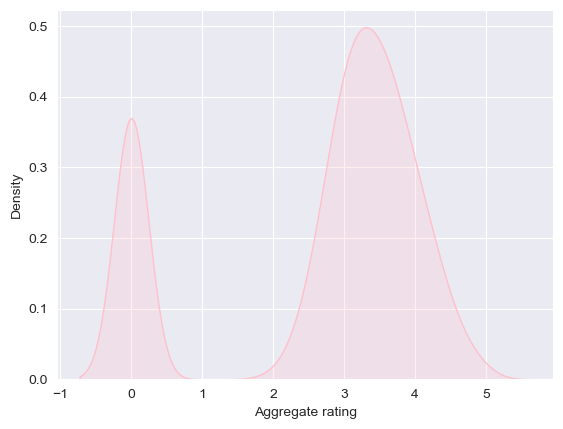

In [19]:
# Now let's analyze the 'Aggregate rating' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Aggregate rating"], shade=True, color='pink')
plt.show()

Here we can see bimodal distribution.

5. 'Votes'

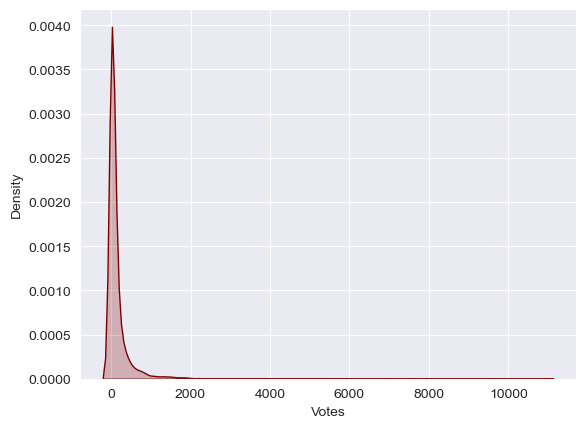

In [20]:
# Now let's analyze the 'Votes' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Votes"], shade=True, color='maroon')
plt.show()

Here we can see distribution is highly skewed to right.

Categorical Columns

1. 'City'

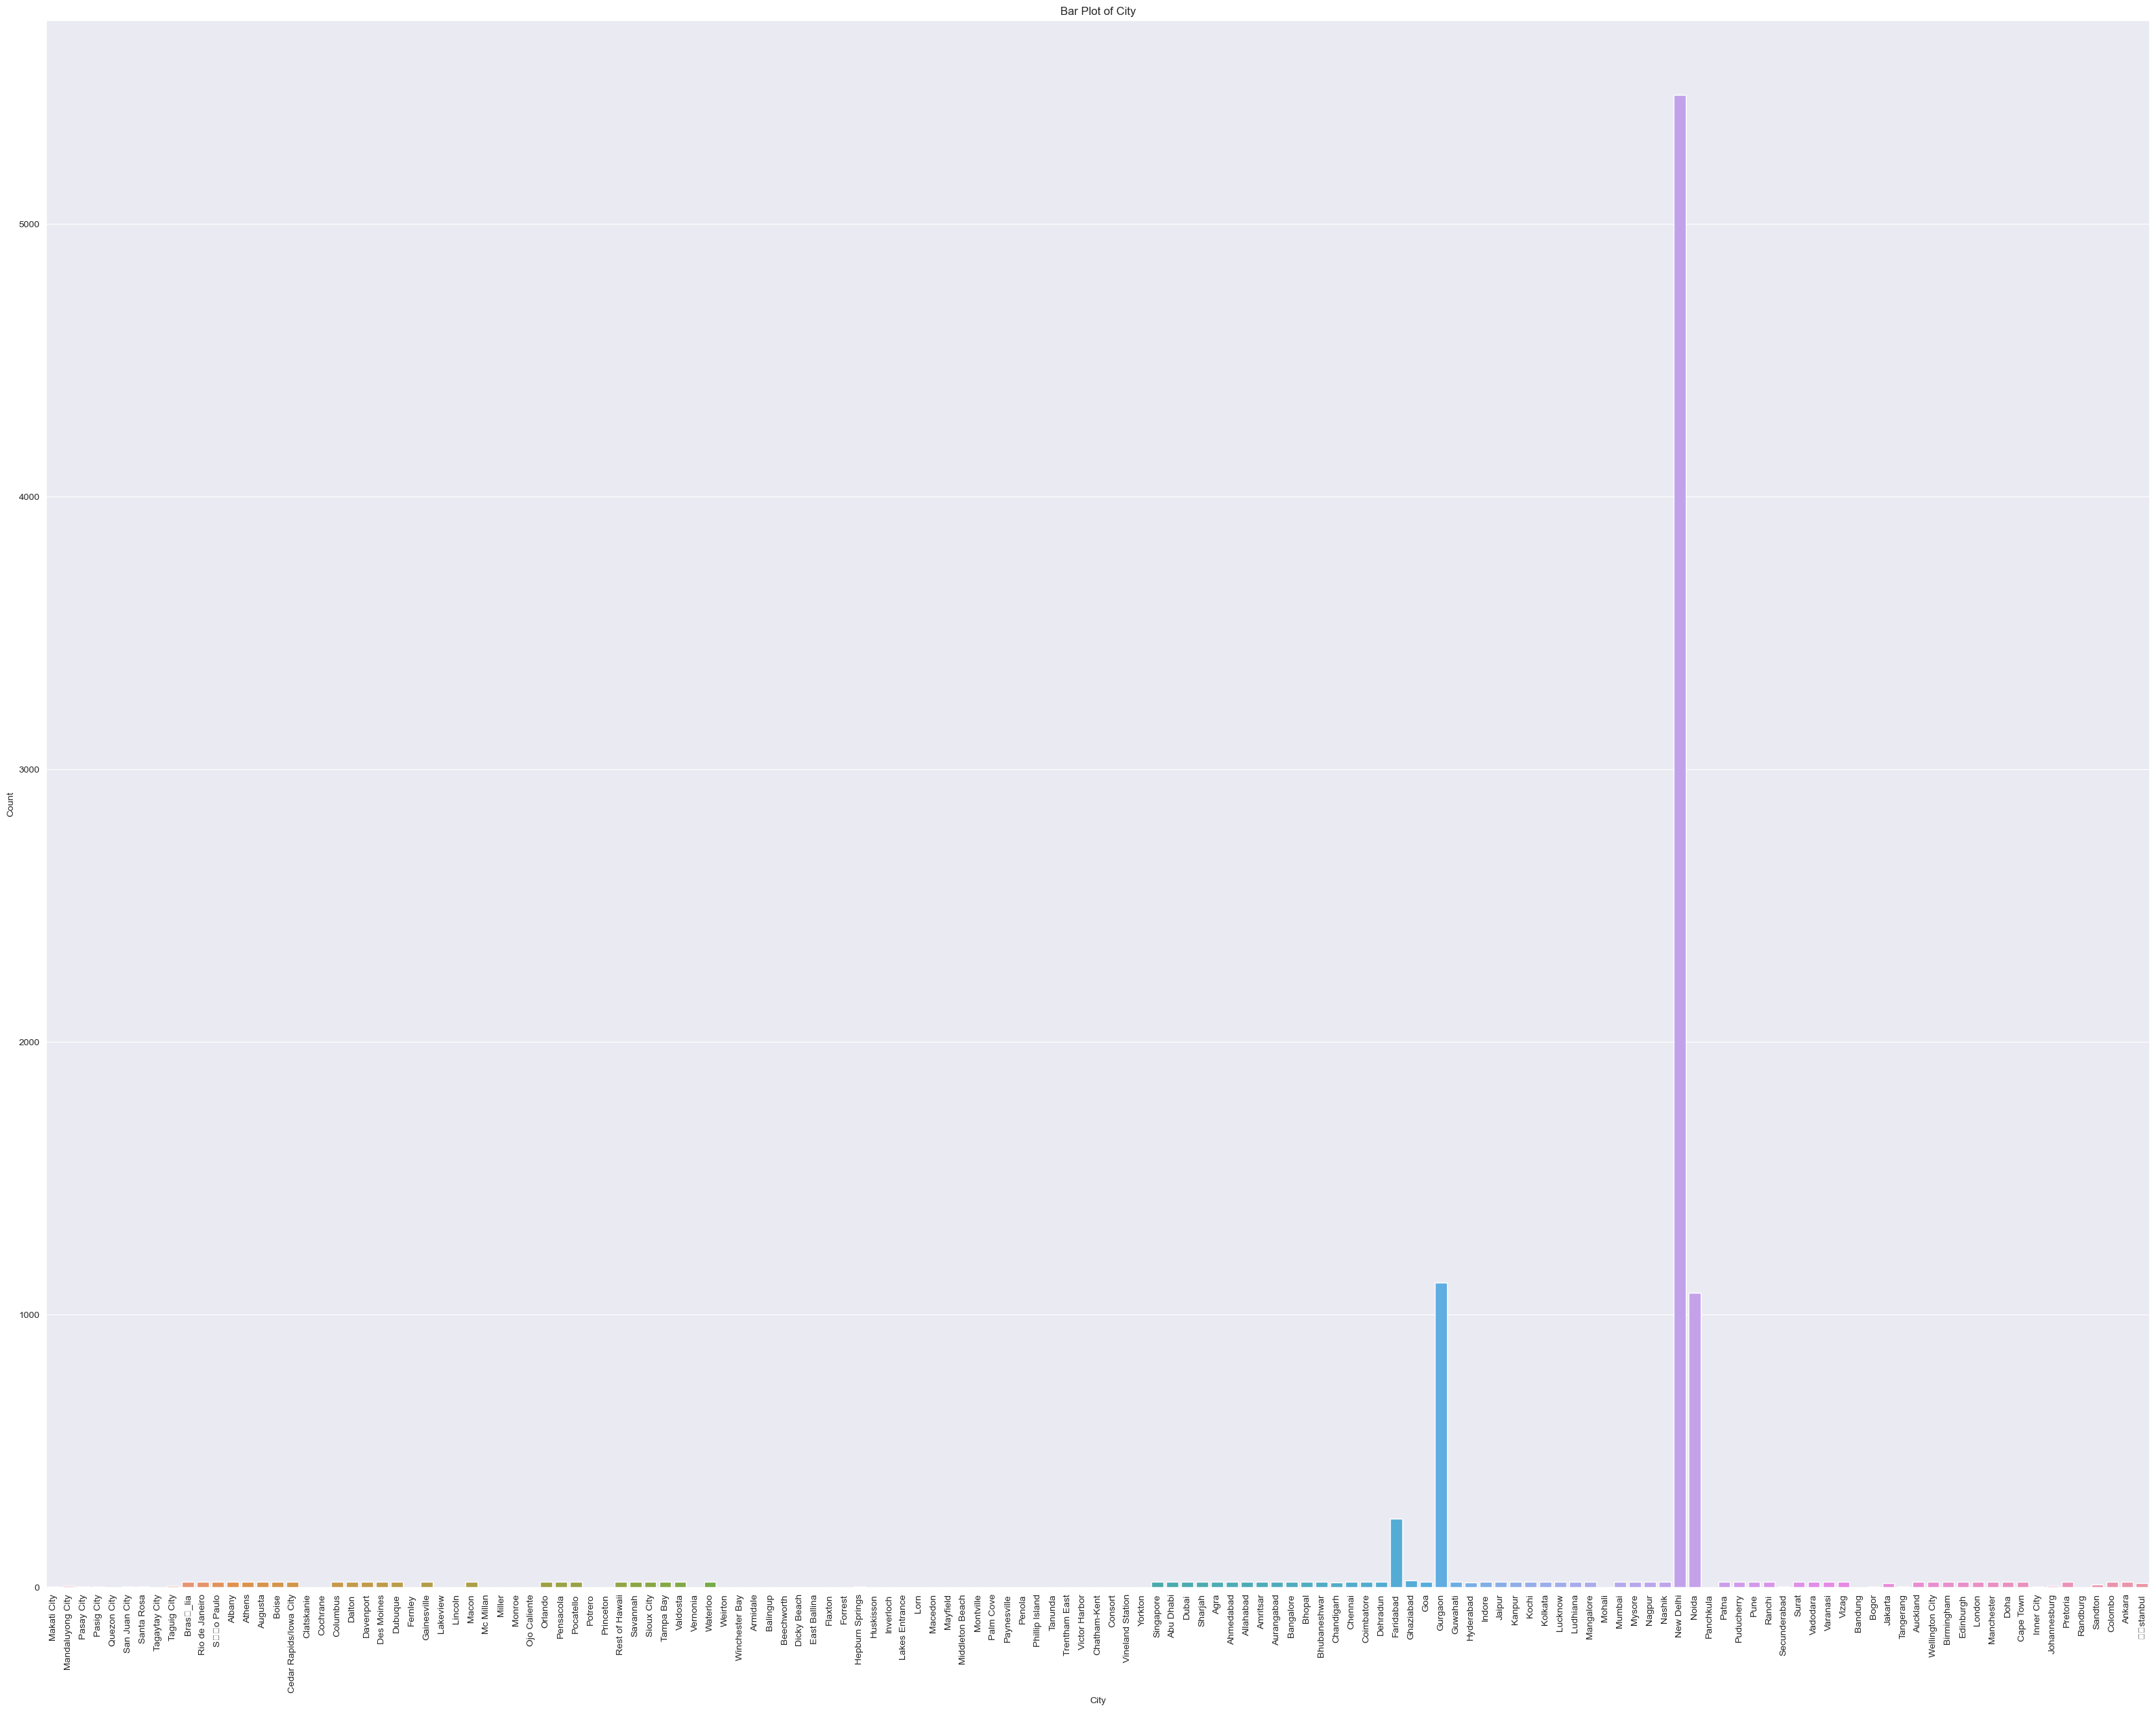

In [21]:
# Let's visualize the 'City' column by bar plot

plt.figure(figsize=(40,30))
sns.countplot(x='City', data=df)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Bar Plot of City')
plt.xticks(rotation = 90)
plt.show()

As we can see in the bar plot New Delhi has the highest count followed by gurgaon and noida.

2. 'Currency'

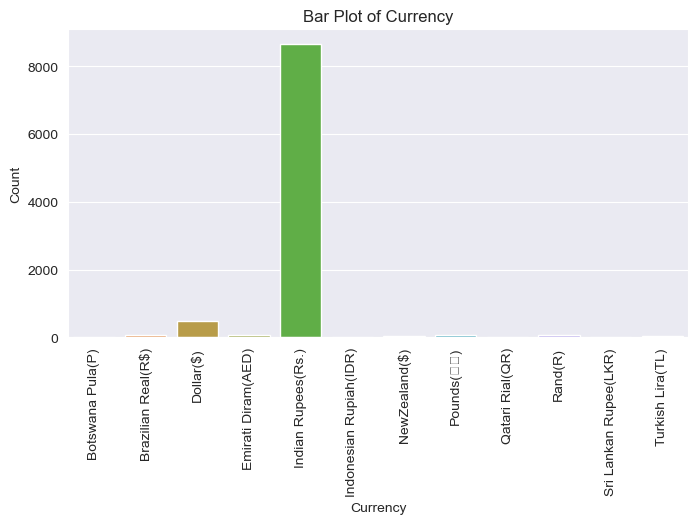

In [22]:
# Let's visualize the 'Currency' column by bar plot

plt.figure(figsize=(8,4))
sns.countplot(x='Currency', data=df)
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Bar Plot of Currency')
plt.xticks(rotation = 90)
plt.show()

Here we can easily visualize Indian Rupees(Rs.) has the highest count in the dataset.

3. 'Has Table booking'

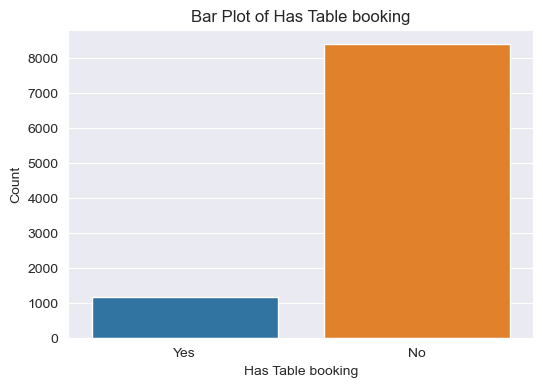

In [23]:
# Let's visualize the 'Has Table booking' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Has Table booking', data=df)
plt.xlabel('Has Table booking')
plt.ylabel('Count')
plt.title('Bar Plot of Has Table booking')
plt.show()

Here we can see maximum count of restaurants with no table booking.

4. 'Has Online delivery'

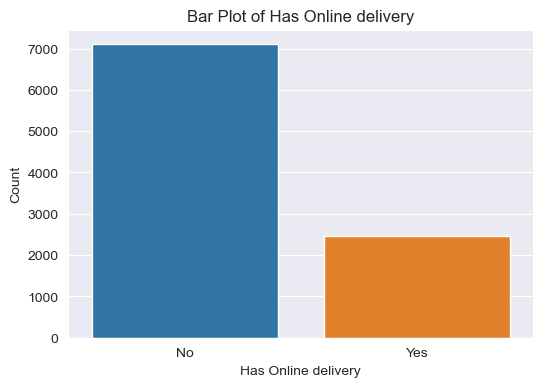

In [24]:
# Let's visualize the 'Has Online delivery' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Has Online delivery', data=df)
plt.xlabel('Has Online delivery')
plt.ylabel('Count')
plt.title('Bar Plot of Has Online delivery')
plt.show()

Here we can see maximum restaurants have no online delivery.

5. 'Is delivery now'

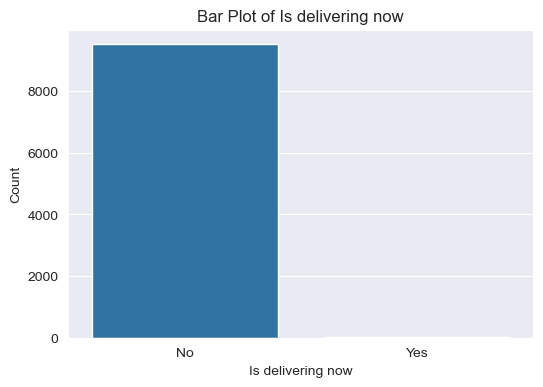

In [25]:
# Let's visualize the 'Is delivering now' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Is delivering now', data=df)
plt.xlabel('Is delivering now')
plt.ylabel('Count')
plt.title('Bar Plot of Is delivering now')
plt.show()

Here we can see only count for not delivering now wich is maximum. 

6. 'Rating color'

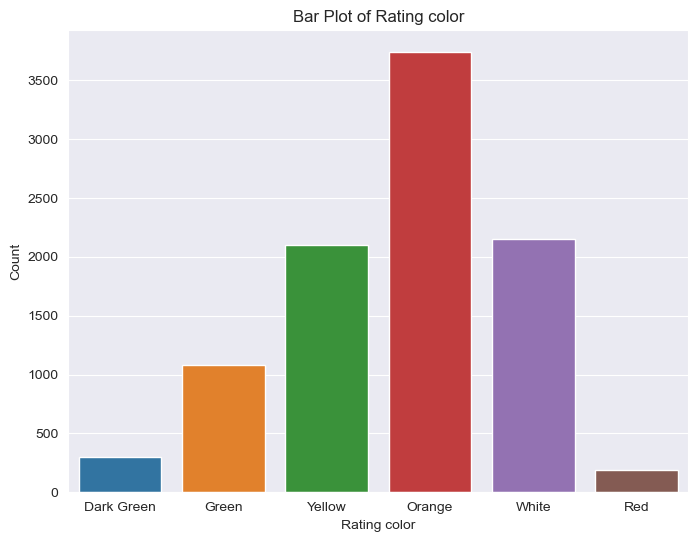

In [26]:
# Let's visualize the 'Rating color' column by bar plot

plt.figure(figsize=(8,6))
sns.countplot(x='Rating color', data=df)
plt.xlabel('Rating color')
plt.ylabel('Count')
plt.title('Bar Plot of Rating color')
plt.show()

Here we can visualize that orange color rating has highest count.

7. 'Rating text'

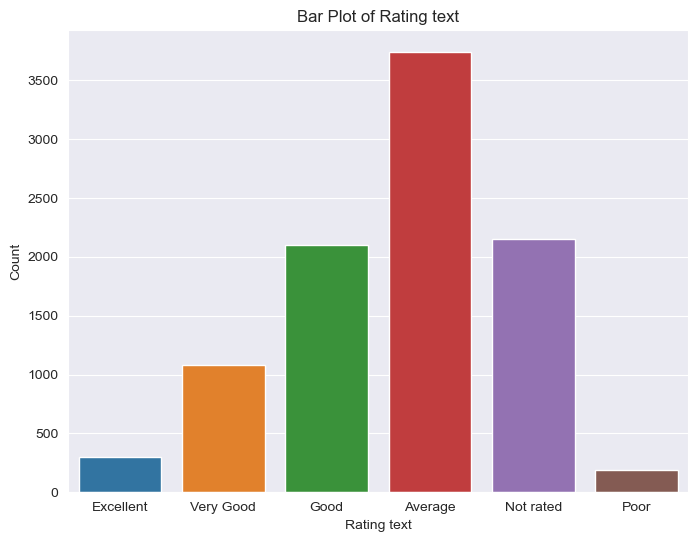

In [27]:
# Let's visualize the 'Rating text' column by bar plot

plt.figure(figsize=(8,6))
sns.countplot(x='Rating text', data=df)
plt.xlabel('Rating text')
plt.ylabel('Count')
plt.title('Bar Plot of Rating text')
plt.show()

As we can visualize average is the highest rating text followed by not rated.

8. 'Country'

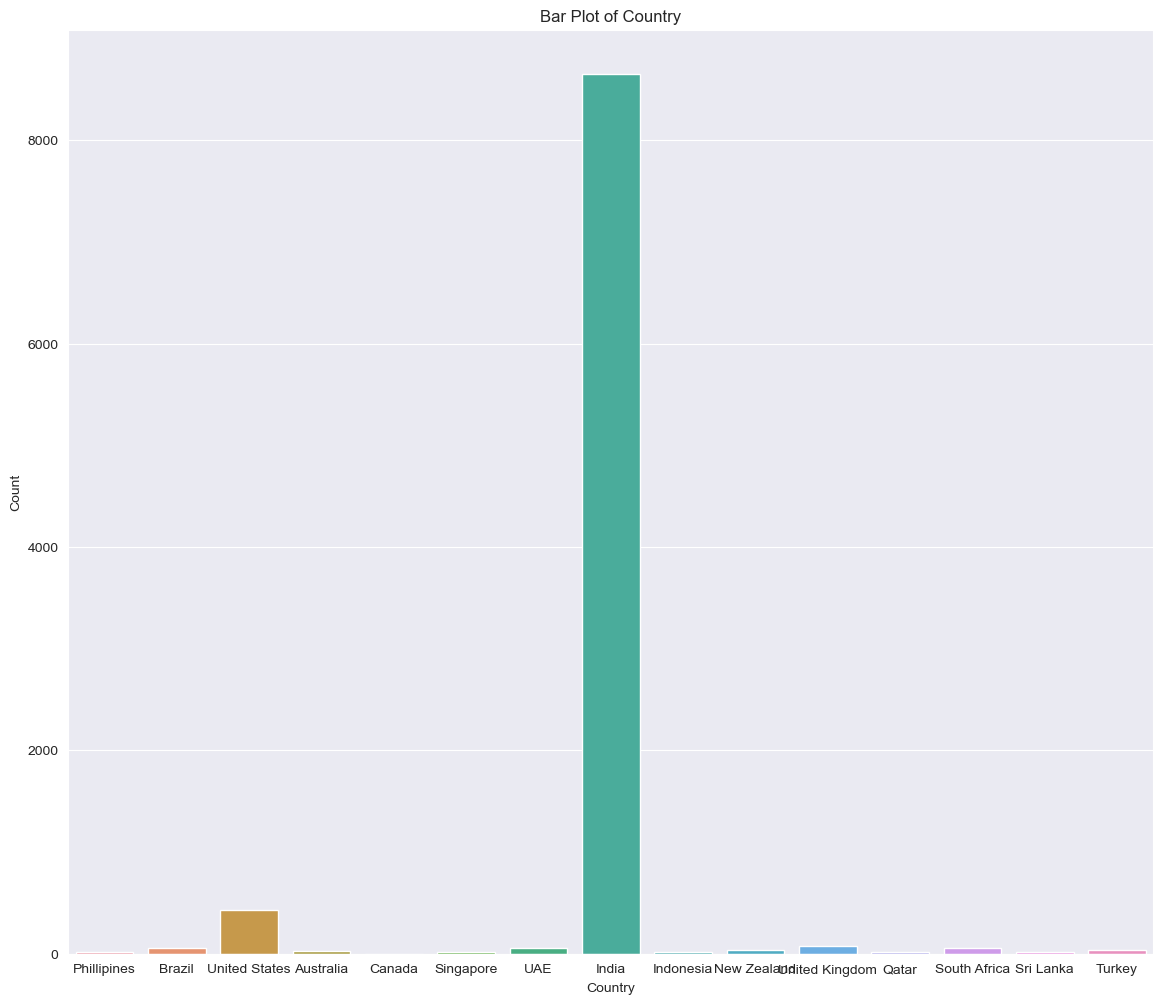

In [28]:
# Let's visualize the 'Country' column by bar plot

plt.figure(figsize=(14,12))
sns.countplot(x='Country', data=df)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Plot of Country')
plt.show()

Here we can see country count of india is the highest.

Bivariate Analysis

1. 'Average Cost for two' vs 'Price range'

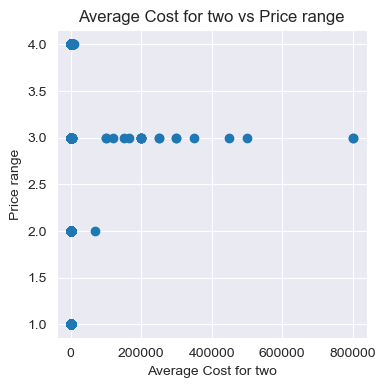

In [29]:
plt.figure(figsize= (4,4))
plt.scatter(df['Average Cost for two'], df['Price range'])
plt.xlabel('Average Cost for two')
plt.ylabel('Price range')
plt.title('Average Cost for two vs Price range')
plt.show()

As we can see null relation.

2. 'Average Cost for two' vs 'Country Code'

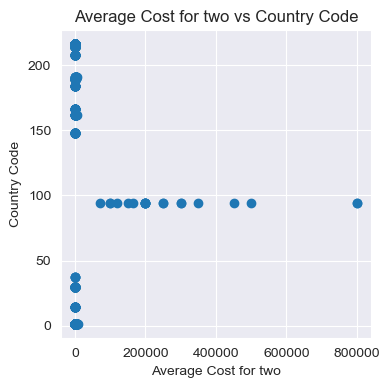

In [30]:
plt.figure(figsize= (4,4))
plt.scatter(df['Average Cost for two'], df['Country Code'])
plt.xlabel('Average Cost for two')
plt.ylabel('Country Code')
plt.title('Average Cost for two vs Country Code')
plt.show()

There is no such pattern seen.

3. 'Price range' vs 'Country Code'

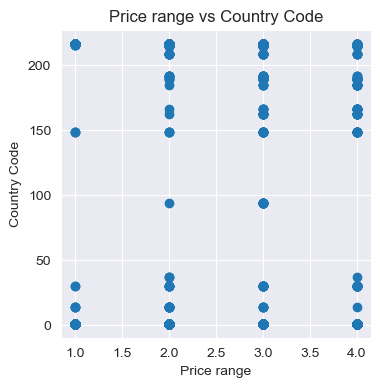

In [31]:
plt.figure(figsize= (4,4))
plt.scatter(df['Price range'], df['Country Code'])
plt.xlabel('Price range')
plt.ylabel('Country Code')
plt.title('Price range vs Country Code')
plt.show()

Null relation.

4. 'Average Cost for two' vs 'Currency'

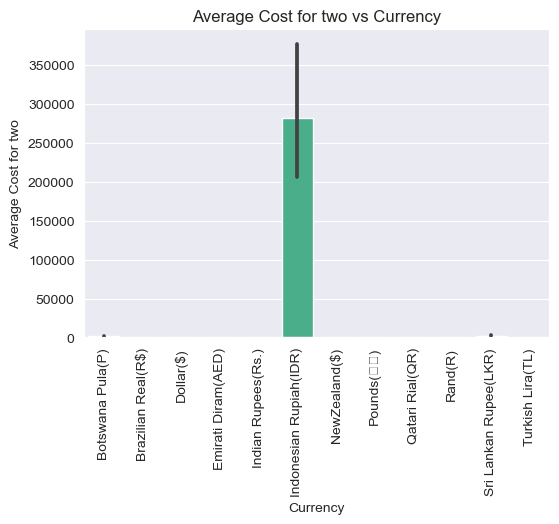

In [32]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, y= 'Average Cost for two', x= 'Currency')
plt.ylabel('Average Cost for two')
plt.xlabel('Currency')
plt.title('Average Cost for two vs Currency')
plt.xticks(rotation=90)
plt.show()

Here we can see average cost for two is higher in Indonesian Rupiah(IDR)

5. 'Price range' vs 'Currency'

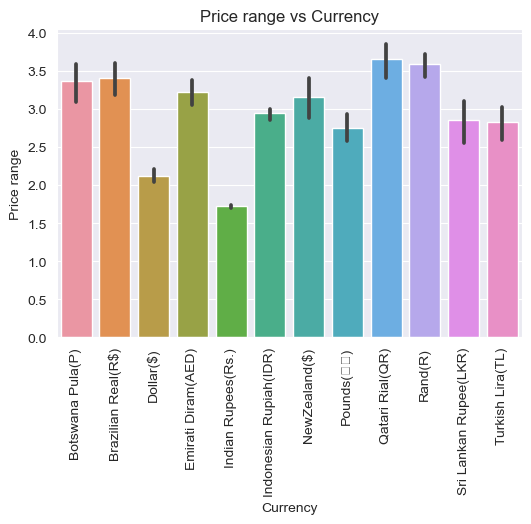

In [33]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, y= 'Price range', x= 'Currency')
plt.ylabel('Price range')
plt.xlabel('Currency')
plt.title('Price range vs Currency')
plt.xticks(rotation=90)
plt.show()

Here we can see price range is higher in Qatari Rial(QR)

Multivariate Analysis

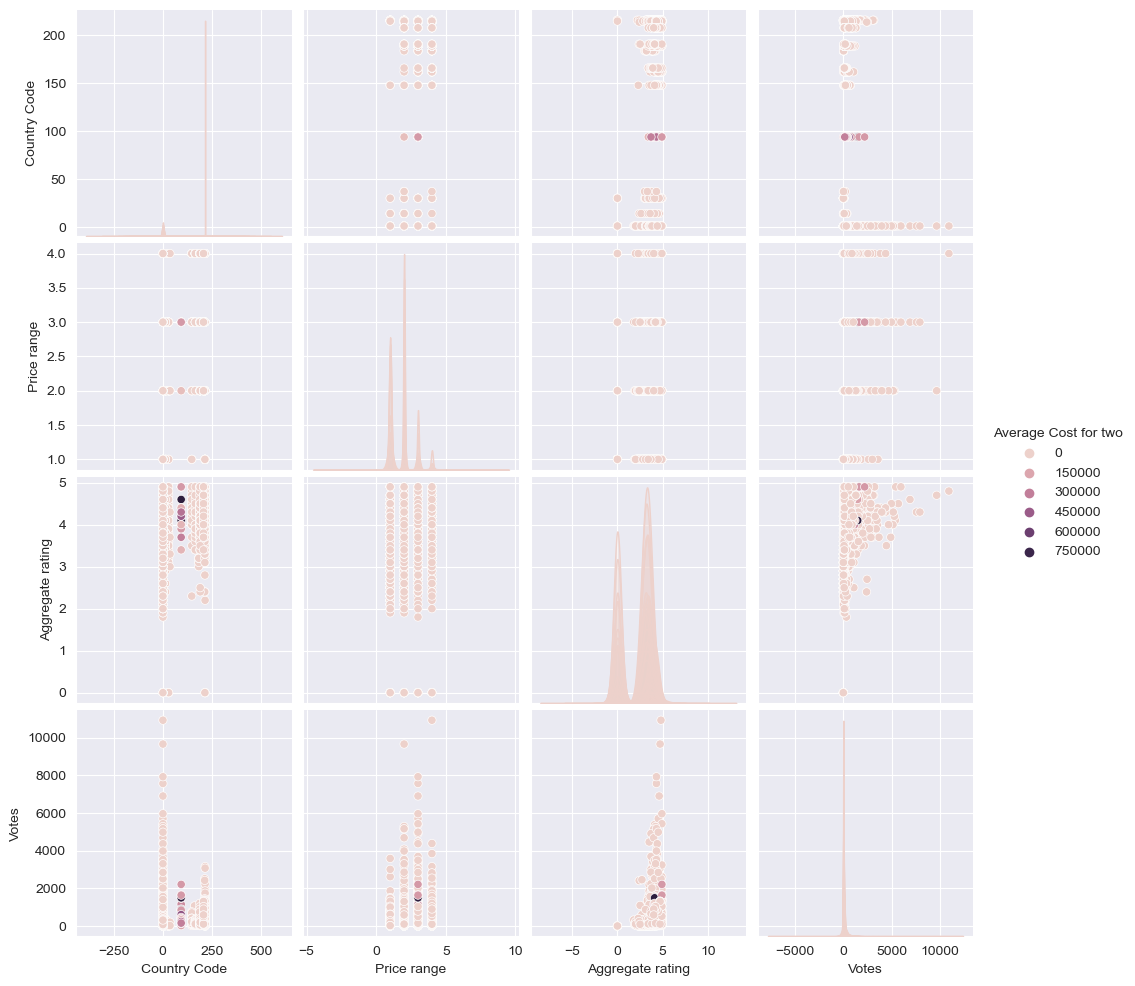

In [34]:
# Using Pairplot

sns.pairplot(data = df, hue = 'Average Cost for two')
plt.show()

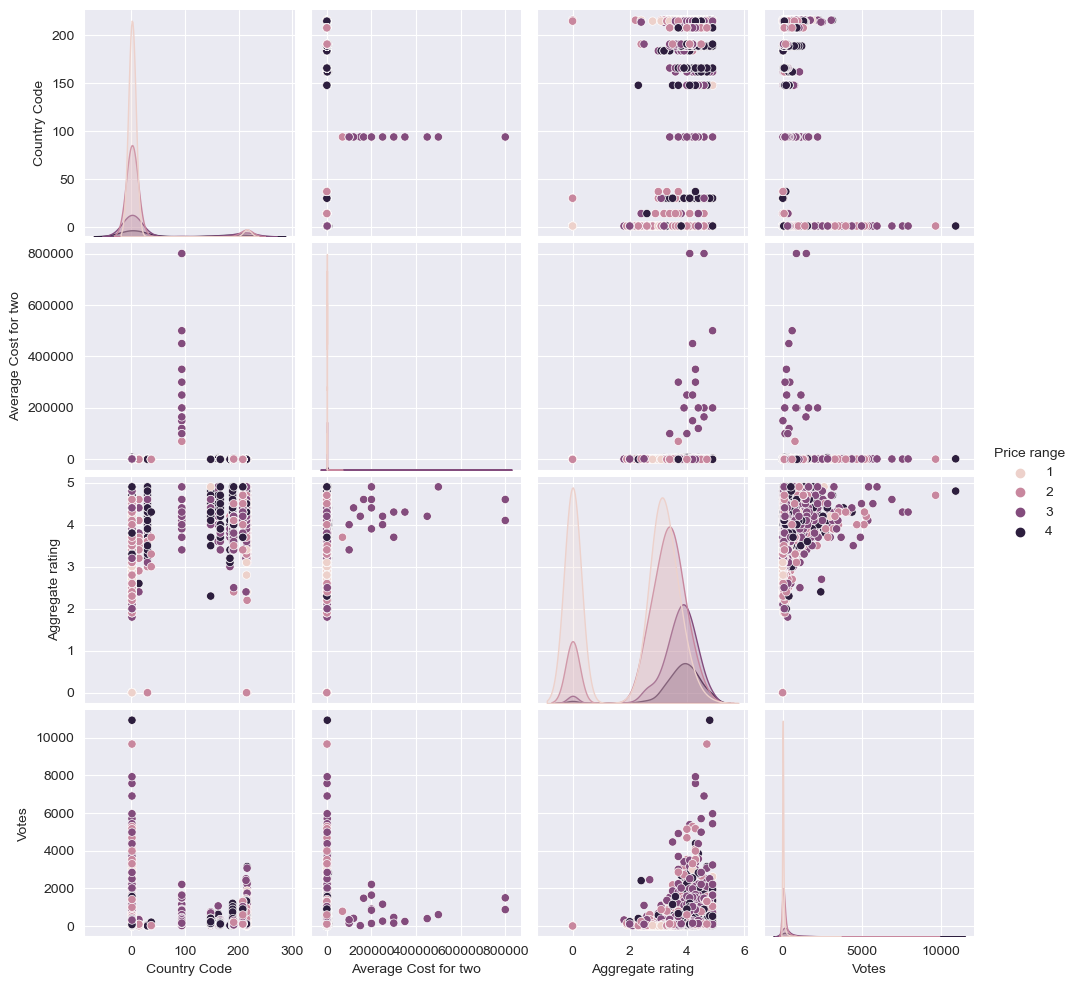

In [35]:
sns.pairplot(data = df, hue = 'Price range')
plt.show()

# Data Preprocessing

Here in this preprocessing step, we will be checking data with outliers, skewness , and will handle them using the different or suitable required technique. We will be encoding categorical columns so that it will be easy for prediction. After that we will check the correlation and will do some feature engineering to know the suitable features for predictions and visualize that by using heatmap.

# Outliers

Here first we will check all the numerical columns to check the presence of outliers there and then will proceed with handling them either by treating them or by removing them.

We will be using winsorizing method first to treat outliers and then will be using clip() function to limit the extreme values. By cliping these extreme values we will be setting boundaries to prevent extremely high or low values from skewing the data for analysisresults. This will help us here to mitigate the impact of outliers and extreme observations on the analysis and avoid causing data loss.

For this we will be importing necessary library first from scipy.stats.mstats

Winsorizing Method: Winsorizing is a data transformation technique used to handle outliers or extreme values in a dataset. It involves replacing extreme values with less extreme values, thereby reducing the impact of outliers on statistical analysis. In winsorizing, we will be trimming or censoring the extreme values by replacing them with the value which is closer to rest of the data. It helps in reducoing the impact of outliers on the statistical measures and provides a more robust analysis.It ensures that extreme values do not unduly influence the results or skew the distribution of the data.

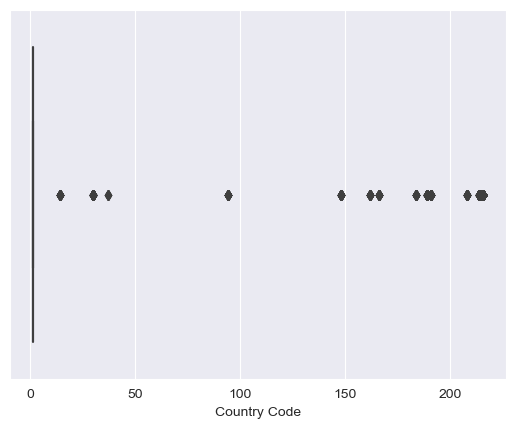

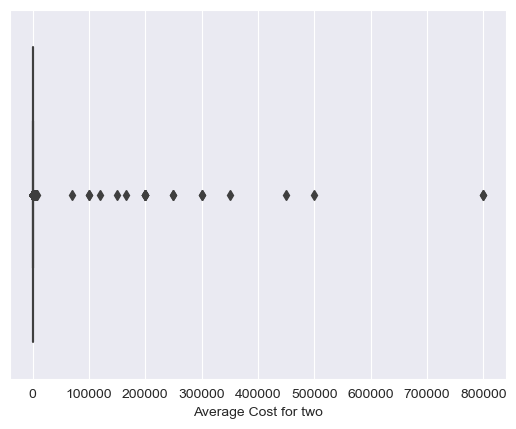

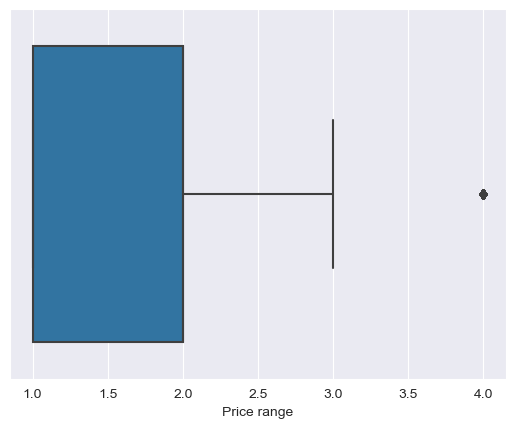

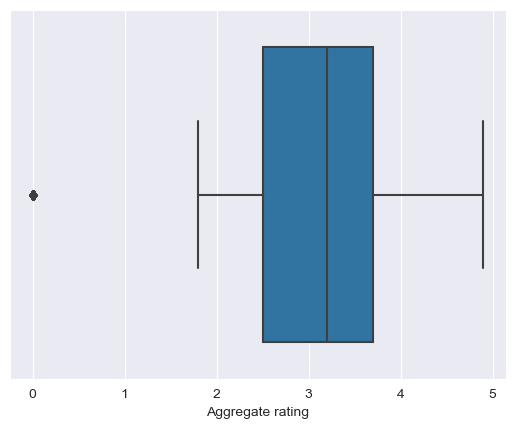

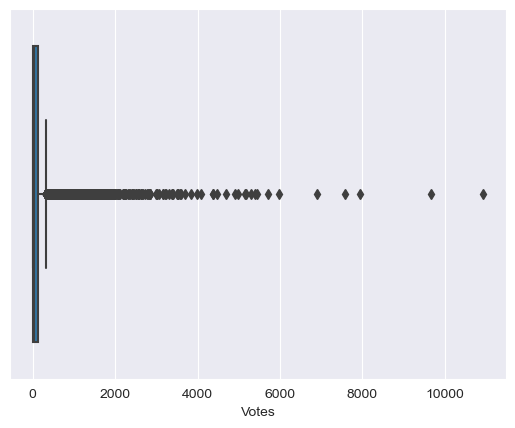

In [36]:
# Lets check the outliers

numerical_columns = ['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [37]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df[num_cols].quantile([0.01, 0.99])
df[num_cols] = df[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

In [38]:
from scipy import stats
from scipy.stats import zscore

z_threshold = 3

# Clculate z-score for numerical columns
columns= ['Country Code', 'Average Cost for two', 'Votes']
z_scores= stats.zscore(df[columns])

# Identify and remove the outliers
outlier_indices= (np.abs(z_scores)> z_threshold).any(axis=1)
df= df[~outlier_indices]

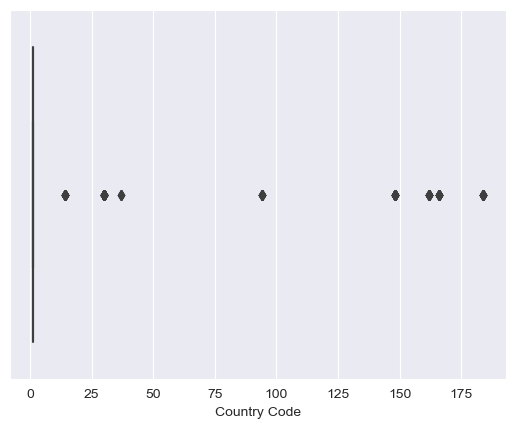

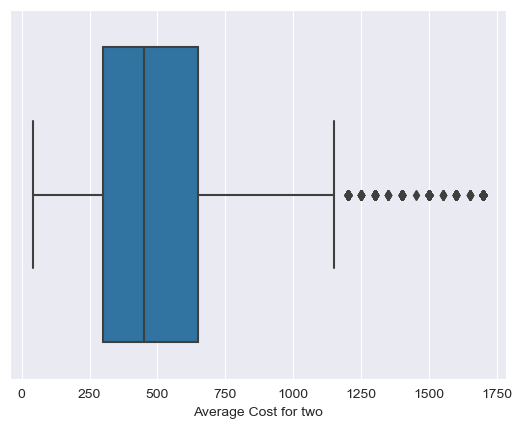

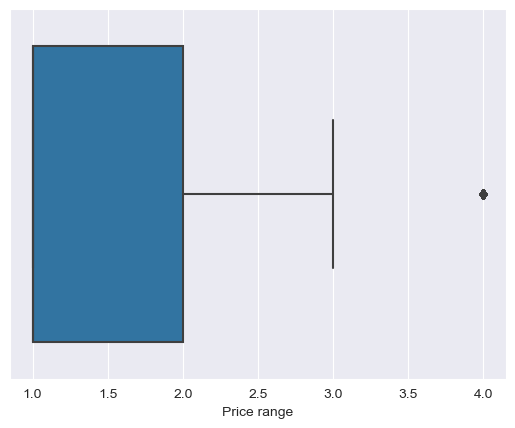

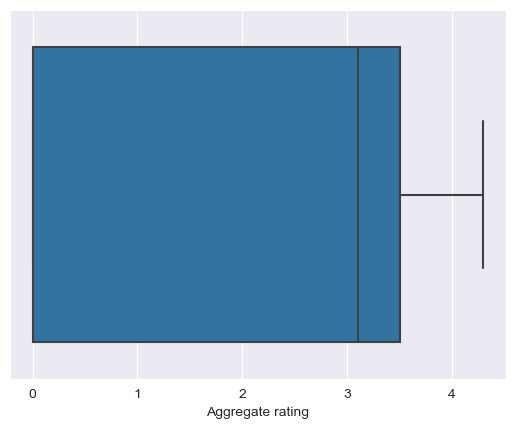

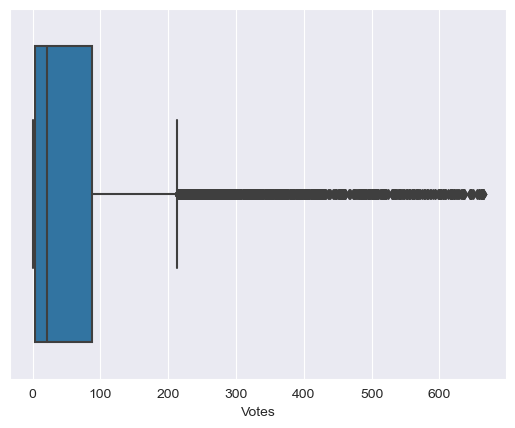

In [39]:
# Lets check the outliers

numerical_columns = ['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [40]:
df.shape

(8481, 16)

Outliers are handled possibly.

# Skewness

Here we will be checking for skewness and those values which are not in the range of -0.5 to +0.5, will be handling them.

We will be using Yeo-johnson transformation  and (if required) log transformation technique to handle the skewness in the column.

Yeo-Johnson transformation: It is a statistical measure and a power transformation technique used to transform a non-normal distribution into a distribution that closely resembles a normal distribution. It is a extension to Boxcox transformation. It involves applying power transformation to the original data. It helps in improving the model's performance. Implementing the Yeo-Johnson transformation in Python can be done using libraries such as SciPy or scikit-learn, using 'from sklearn.preprocessing import PowerTransformer' .

In [41]:
df.skew()

Country Code            8.656323
Average Cost for two    1.486801
Price range             1.067322
Aggregate rating       -0.881080
Votes                   2.496207
dtype: float64

In [42]:
from sklearn.preprocessing import PowerTransformer

# Define columns to transform
columns = ['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
# Apply Yeo-Johnson transformation to selected columns
pt = PowerTransformer(method='yeo-johnson')
df[columns] = pt.fit_transform(df[columns])

# Round transformed values to 2 decimal places
df[columns] = df[columns].round(2)

df.skew()

Country Code            6.331566
Average Cost for two    0.001705
Price range             0.253229
Aggregate rating       -0.653389
Votes                  -0.029411
dtype: float64

In [43]:
# Apply log transformation to few columns
df['Country Code'] = np.log(df['Country Code'] + 1)
df['Aggregate rating'] = np.log(df['Aggregate rating'] + 1)

df.skew()

Country Code            6.331566
Average Cost for two    0.001705
Price range             0.253229
Aggregate rating       -0.521892
Votes                  -0.029411
dtype: float64

Skewness is handled possibly.

# Encoding Categorical Columns

Here we will be using Label encoder method to encode the categorical column into numerical column.

Label Encoder: Label encoding assigns numerical labels to each unique category in a categorical variable using integers starting from 0.The labels are assigned in an ordinal manner, which means that the labels are ordered based on the alphabetical or numerical order of the categories.

For this we will be importing library from 'sklearn.preprocessing import LabelEncoder'

Lets encode categorical columns.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])
    
df.dtypes    

Restaurant Name           int64
Country Code            float64
City                      int64
Locality                  int64
Cuisines                  int64
Average Cost for two    float64
Currency                  int64
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Price range             float64
Aggregate rating        float64
Rating color              int64
Rating text               int64
Votes                   float64
Country                   int64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8481 entries, 0 to 9436
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       8481 non-null   int64  
 1   Country Code          8481 non-null   float64
 2   City                  8481 non-null   int64  
 3   Locality              8481 non-null   int64  
 4   Cuisines              8481 non-null   int64  
 5   Average Cost for two  8481 non-null   float64
 6   Currency              8481 non-null   int64  
 7   Has Table booking     8481 non-null   int64  
 8   Has Online delivery   8481 non-null   int64  
 9   Is delivering now     8481 non-null   int64  
 10  Price range           8481 non-null   float64
 11  Aggregate rating      6337 non-null   float64
 12  Rating color          8481 non-null   int64  
 13  Rating text           8481 non-null   int64  
 14  Votes                 8481 non-null   float64
 15  Country              

In [46]:
df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8481 entries, 0 to 9436
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       8481 non-null   int64  
 1   Country Code          8481 non-null   float64
 2   City                  8481 non-null   int64  
 3   Locality              8481 non-null   int64  
 4   Cuisines              8481 non-null   int64  
 5   Average Cost for two  8481 non-null   float64
 6   Currency              8481 non-null   int64  
 7   Has Table booking     8481 non-null   int64  
 8   Has Online delivery   8481 non-null   int64  
 9   Is delivering now     8481 non-null   int64  
 10  Price range           8481 non-null   float64
 11  Aggregate rating      8481 non-null   float64
 12  Rating color          8481 non-null   int64  
 13  Rating text           8481 non-null   int64  
 14  Votes                 8481 non-null   float64
 15  Country              

In [47]:
df.describe()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000
mean,3213.278269,-0.112003,50.169791,464.538616,716.670322,-0.001061,2.990449,0.113902,0.267775,0.003891,0.000850,0.386865,3.056951,1.623158,-0.000356,3.015446
std,1885.785603,0.327598,13.697677,224.228954,387.991279,0.999717,0.309104,0.317711,0.442826,0.062260,0.996712,0.261059,1.382313,1.605989,1.000878,0.437210
min,0.000000,-0.162519,0.000000,0.000000,0.000000,-2.860000,0.000000,0.000000,0.000000,0.000000,-0.950000,-1.171183,0.000000,0.000000,-1.570000,0.000000
25%,1577.000000,-0.162519,56.000000,291.000000,338.000000,-0.530000,3.000000,0.000000,0.000000,0.000000,-0.950000,0.277632,2.000000,0.000000,-0.880000,3.000000
50%,3149.000000,-0.162519,56.000000,476.000000,865.000000,0.020000,3.000000,0.000000,0.000000,0.000000,-0.950000,0.386865,2.000000,2.000000,0.040000,3.000000
75%,4832.000000,-0.162519,56.000000,644.000000,992.000000,0.550000,3.000000,0.000000,1.000000,0.000000,0.710000,0.518794,4.000000,3.000000,0.800000,3.000000
max,6558.000000,2.012233,87.000000,865.000000,1358.000000,2.050000,6.000000,1.000000,1.000000,1.000000,1.740000,0.908259,5.000000,5.000000,2.020000,8.000000


# Correlation Matrix between Target and Independent Variables

Now here, we will be checking the correlation matrix which shows the relation between target and independent variable. We will get it by using df.corr() function. We will be finding the correlation to know which feature is more positive or negatively correlated to the target vaiable, which will be helping us for the feature selction to avoid overfitting. We will also be visualizing this correlation with using heatmap. And will be using seaborn library for heatmap.

In [48]:
# Check the correlation
df.corr()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,-0.000702,0.006497,0.007890,0.062429,0.058154,0.001163,0.039952,0.031722,0.012929,0.061917,0.001061,-0.007096,0.003524,0.034186,0.002599
Country Code,-0.000702,1.000000,-0.011170,-0.027340,-0.067735,-0.216846,-0.200376,-0.020793,-0.093256,-0.009638,0.206309,0.199590,-0.126415,0.105405,0.097112,0.229111
City,0.006497,-0.011170,1.000000,-0.018403,0.011830,-0.078509,-0.092586,0.000352,-0.010879,-0.024973,-0.104238,-0.080181,0.044244,-0.035666,-0.082408,0.013621
Locality,0.007890,-0.027340,-0.018403,1.000000,-0.012112,-0.071115,0.029561,-0.059555,-0.040608,-0.011984,-0.086411,-0.095322,0.003181,0.016408,-0.158265,0.006569
Cuisines,0.062429,-0.067735,0.011830,-0.012112,1.000000,0.021842,0.043167,0.049115,-0.032831,0.007869,0.019238,-0.116357,-0.042458,-0.067921,-0.032697,0.008690
Average Cost for two,0.058154,-0.216846,-0.078509,-0.071115,0.021842,1.000000,0.003707,0.555228,0.224725,0.037124,0.757118,0.139082,-0.052573,-0.003687,0.469775,0.022854
Currency,0.001163,-0.200376,-0.092586,0.029561,0.043167,0.003707,1.000000,-0.032150,0.018686,0.001931,-0.039854,-0.025473,0.018660,0.013653,0.031363,0.384157
Has Table booking,0.039952,-0.020793,0.000352,-0.059555,0.049115,0.555228,-0.032150,1.000000,0.064816,-0.016446,0.473741,0.116094,-0.012893,0.024505,0.284991,0.023838
Has Online delivery,0.031722,-0.093256,-0.010879,-0.040608,-0.032831,0.224725,0.018686,0.064816,1.000000,0.103352,0.185876,-0.018123,-0.012009,-0.075147,0.368483,-0.021366
Is delivering now,0.012929,-0.009638,-0.024973,-0.011984,0.007869,0.037124,0.001931,-0.016446,0.103352,1.000000,0.033297,-0.014129,-0.005316,-0.030150,0.036205,-0.002208


In [49]:
correlation_matrix= df.corr()
Average_Cost_for_two_correlation= correlation_matrix['Average Cost for two']
print(Average_Cost_for_two_correlation)

correlation_matrix= df.corr()
Price_range_correlation= correlation_matrix['Price range']
print(Price_range_correlation)

Restaurant Name         0.058154
Country Code           -0.216846
City                   -0.078509
Locality               -0.071115
Cuisines                0.021842
Average Cost for two    1.000000
Currency                0.003707
Has Table booking       0.555228
Has Online delivery     0.224725
Is delivering now       0.037124
Price range             0.757118
Aggregate rating        0.139082
Rating color           -0.052573
Rating text            -0.003687
Votes                   0.469775
Country                 0.022854
Name: Average Cost for two, dtype: float64
Restaurant Name         0.061917
Country Code            0.206309
City                   -0.104238
Locality               -0.086411
Cuisines                0.019238
Average Cost for two    0.757118
Currency               -0.039854
Has Table booking       0.473741
Has Online delivery     0.185876
Is delivering now       0.033297
Price range             1.000000
Aggregate rating        0.236777
Rating color           -0.087638


In [50]:
df= df.drop(['Restaurant Name', 'Cuisines', 'Rating color'], axis = 1)

# Visualisation of Correlation Matrix

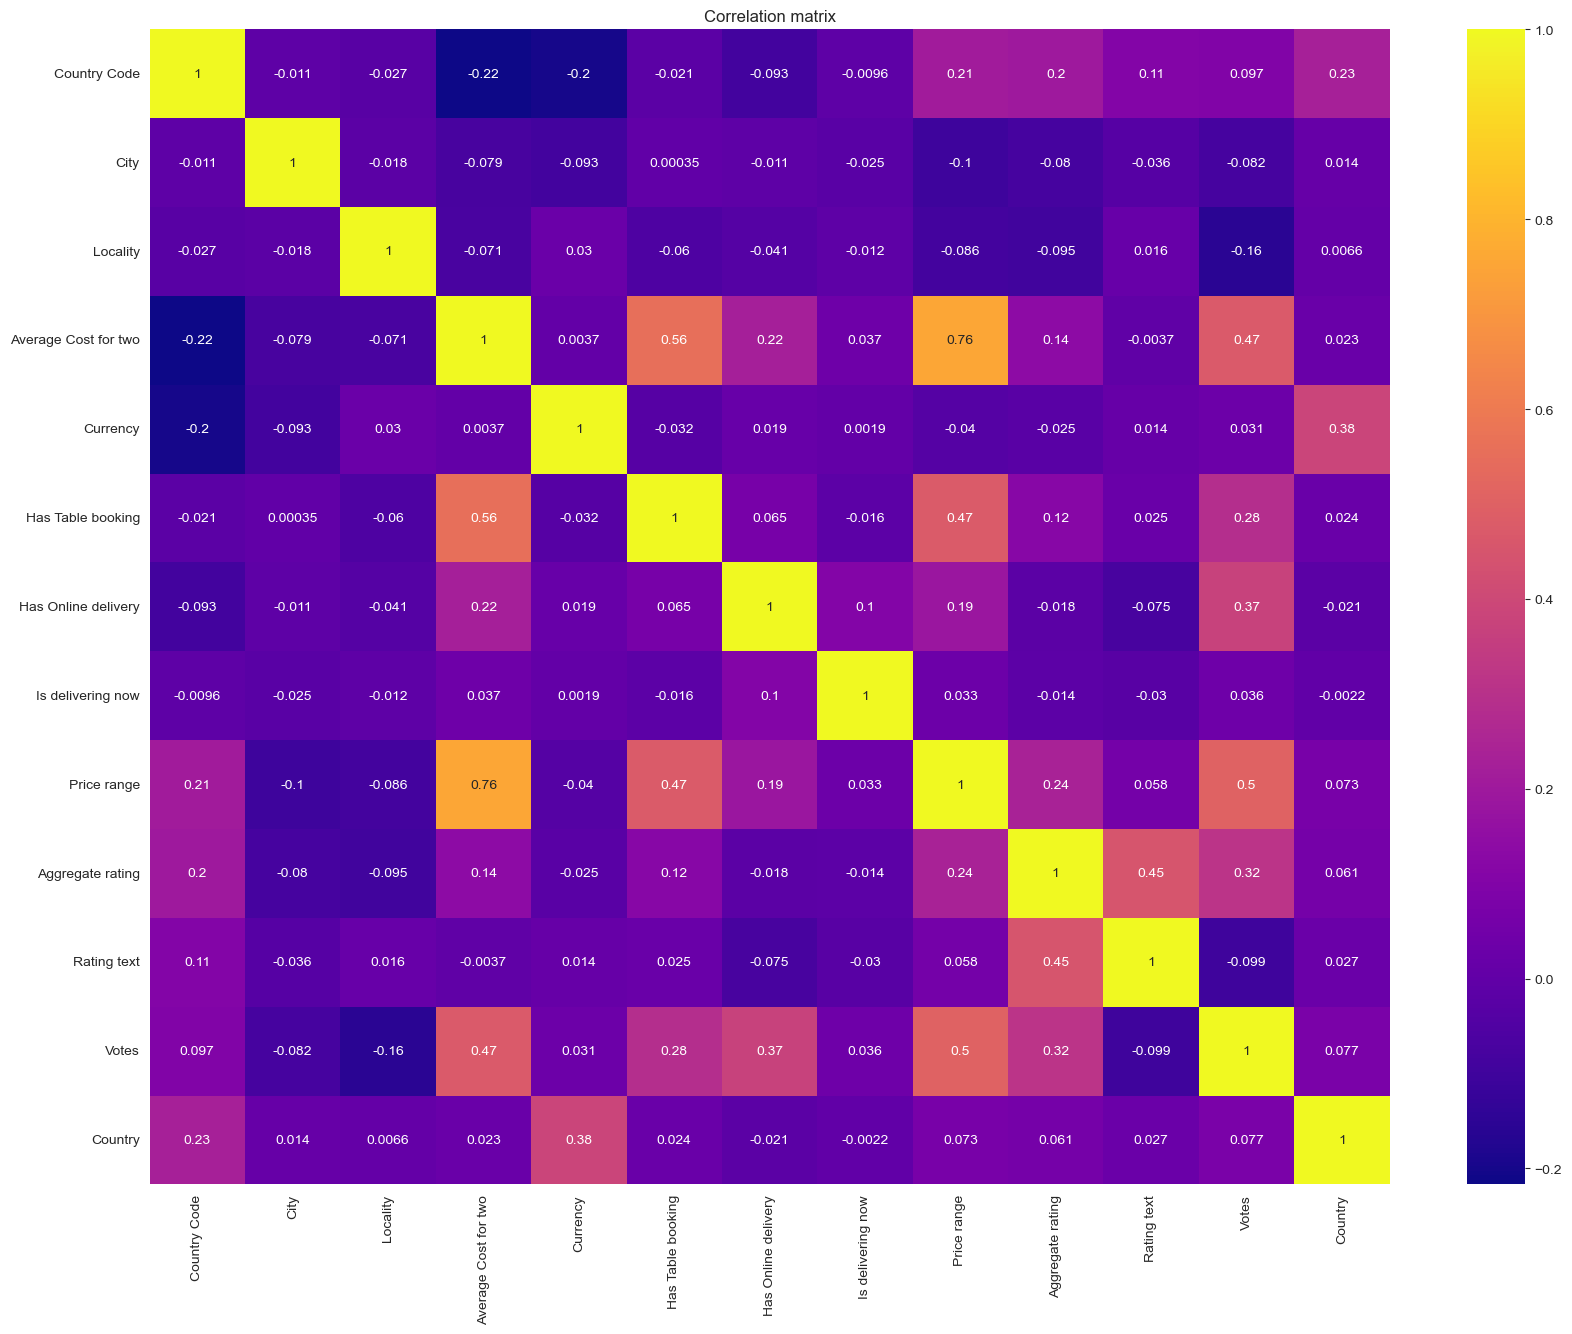

In [51]:
# Let's visualize the relation by using heatmap

correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation matrix')
plt.show()

# Feature Engineering

Now we will be defining the target and independent variable, so that it will be clear what to predict on what basis. Then we will proceed with the feature scaling process using MinMaxScaler from sklearn.preprocessing.

Feature Scaling: It is performed to bring all the features to a similar scale or value range. It basically helps in improving the performance, convergence, and interpretability of ML algorithm. It ensures that all features should be treated equally during the modeling.

MinMaxScaler: This technique used to transform features by scaling them to a specified range which should be between 0-1. It ensures that all features are scaled proportionally. This technique is useful to preserve the shape of the original distribution while bringing all features to a common scale.

After this we will proceed with checking out for multicollinearity by finding the vif(variation inflation factor) values. For this we will be importing statsmodels.api and then from statsmodels.stats.outliers_inflation importing variance_inflation_factor to find out the vif values for the features.

A vif value 1 indicates no multicollinearity, while values greater than 1 suggest increasing multicollinearity. Generally , vif value above 5 or 10 is considered very high, so in that case we need to handle the multicollinearity.

If we will find any value above range we will be handling that by dropping one or two column with high multicollinearity, an will also be adding constant term for calculating vif. A constant term will allow and help us for a more accurate assessment of multicollinearity and its impact on predictor variable.

After handling multicollinearity issue, we will proceed with finding the Best Random State, which will ensure that further operations should be reproducible. Here we will be using logistic regression algorithm for classification tasks to generate the best random state. The genrated best random score by this alogorithm should be used in all further runs for results reproducibility.

We will have to balance the target variable if there is any imbalance, and in that case we will be using RandomOverSampler technique.

Now we will be spliting the data into train and test so that we can train models on train data and can check its performance on test data. As We have a limited observation so, we will be taking "test size- 0.2", rest will be used as train data to train the model.

# Target and Independent Vriables for "Average Cost for two"

In [52]:
# Define Target and Independent Variable

y = df['Average Cost for two']
X = df.drop('Average Cost for two', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Average Cost for two
Target variable dimensions:  (8481,)

Features variables names:  ['Country Code', 'City', 'Locality', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Aggregate rating', 'Rating text', 'Votes', 'Country']
Features variables dimensions:  (8481, 12)


# Feature Selection

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y = df['Average Cost for two']
X = df.drop('Average Cost for two', axis=1)

# Initialize the model
model= LinearRegression()

# Initialize the RFE selector with model
rfe= RFE(model, n_features_to_select=5)

# Fit the selctor on data
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

Index(['Country Code', 'Currency', 'Has Table booking', 'Is delivering now',
       'Price range'],
      dtype='object')


In [54]:
fit_score = rfe.ranking_
print(fit_score)
# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the features based on their rankings (lower rank indicates higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print(feature_rankings)

[1 7 8 1 1 4 1 1 5 6 3 2]
                Feature  Ranking
0          Country Code        1
3              Currency        1
4     Has Table booking        1
6     Is delivering now        1
7           Price range        1
11              Country        2
10                Votes        3
5   Has Online delivery        4
8      Aggregate rating        5
9           Rating text        6
1                  City        7
2              Locality        8


In [55]:
X = X.drop(['City', 'Locality'], axis = 1)

# Feature Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

      Country Code  Currency  Has Table booking  Has Online delivery  \
0              1.0       0.0                1.0                  0.0   
1              1.0       0.0                1.0                  0.0   
2              1.0       0.0                1.0                  0.0   
3              1.0       0.0                0.0                  0.0   
4              1.0       0.0                1.0                  0.0   
...            ...       ...                ...                  ...   
8476           1.0       1.0                0.0                  0.0   
8477           1.0       1.0                0.0                  0.0   
8478           1.0       1.0                0.0                  0.0   
8479           1.0       1.0                0.0                  0.0   
8480           1.0       1.0                0.0                  0.0   

      Is delivering now  Price range  Aggregate rating  Rating text     Votes  \
0                   0.0     0.869888          1.000000

# Variance Inflation Factor(VIF)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# add a constant column to features
X_scaled_df = sm.add_constant(X_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

                      X         VIF
0                 const  150.484425
1          Country Code    1.294824
2              Currency    1.319179
3     Has Table booking    1.333156
4   Has Online delivery    1.221345
5     Is delivering now    1.012917
6           Price range    1.695151
7      Aggregate rating    1.559501
8           Rating text    1.382238
9                 Votes    1.779189
10              Country    1.329573


All vif are in range.

# Best Random State

In [58]:
# Find the best random state

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1

for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Average Cost for two', axis=1), df['Average Cost for two'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 90
Best R^2 score: 0.7961619983627526


Best R2 score is 0.7961619983627526 on best random state 90

# Split the Data

In [59]:
# Let's split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=90)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6784, 10)
(1697, 10)
(6784,)
(1697,)


# Modelling

Regression algorithm:

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using regression algorithm as this is the regression problem, where we have to predict the number of wins(continous).

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Linear Regression, Lasso, Ridge, and ElasticNet will be importing from sklearn.linear_model DecisionTree Regression will be importing from sklearn.tree RandomForest Regression, and GradientBoost Regression will be importing from sklearn.ensemble. We will be train our model on each algorithms and will be evaluating the R2 score for test data and train data, Mean absolute error(MAE), Mean square error(MSE), and Root mean square error(RMSE) to check the accuracy and performance. On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the R2 score and mean cv score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection

# Linear Regression(LR)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.8922380671236407
MAE: 0.3533582132449131
MSE: 0.20664237875055744
Root mean square error: 0.4545793426350976
Root squared on training data: 0.8686323451008864


Here we can see the performance of model is well on both test and train data as R2 for test data is 89.2% and for train data is 86.8%

# Lasso(L1) Regression

In [61]:
# Initialize the Lasso Regression model and fit the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.5030126976177427
MAE on test data: 0.4936526757650652
MSE on test data: 0.5036438531591256
RMSE on test data: 0.7096786971292893
Root squared on training data: 0.5002781369204581


Here we can see the performance of model is quite average on both test and train data as R2 for test data is 50.3% and for train data is 50%

# Ridge(L2) Regression

In [62]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7959649682634438
MAE on test data: 0.3534252666769397
MSE on test data: 0.2067678370668012
RMSE on test data: 0.45471731555638084
Root squared on training data: 0.7545214103882909


Here we can see the performance of model is well on both test and train data as R2 for test data is 79.5% and for train data is 75.4%. 

# ElasticNet

In [63]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7653828150316471
MAE on test data: 0.36498301751297335
MSE on test data: 0.23775960168077542
RMSE on test data: 0.48760599020190004
Root squared on training data: 0.7385776651087823


Here we can see the performance of model is well on both test and train data as R2 for test data is 76.5% and for train data is 73.8%.

# DecisionTreeRegression(DTR)

In [64]:
# Initialize the Decision Tree Regression model and fit the training data
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7559469054048067
MAE on test data: 0.3565567571039045
MSE on test data: 0.2473218940366229
RMSE on test data: 0.49731468310982224
Root squared on training data: 0.8831763749688851


Here we can see model is overfitted as it is performing excellent in train data but well on test data i.e., R2 for test data is 75.5% and train data is 88.3%

# RandomForestRegression(RFR)

In [65]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=90)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8101602722581667
MAE on test data: 0.32222813969384717
MSE on test data: 0.19238240394527564
RMSE on test data: 0.43861418575471955
Root squared on training data: 0.8730359437365414


Here we can see model is overfitted as it is performing excellent in train data but well on test data i.e., R2 for test data is 81% and train data is 87.3%

# GradientBoostingRegression(GBR)

In [66]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=90)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8248407791364163
MAE on test data: 0.3145759021215186
MSE on test data: 0.17750526922764912
RMSE on test data: 0.421313742035136
Root squared on training data: 0.8151427748221169


Here we can see the performance of model is well on both test and train data as R2 for test data is 82.4% and for train data is 81.5%.

# KNeighborsRegression

In [67]:
# Initialize the KNeighbors Regression model and fit the training data
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = knr.predict(X_train)
y_test_pred = knr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7894558062767231
MAE on test data: 0.3353329404832056
MSE on test data: 0.213364181496759
RMSE on test data: 0.4619136082610676
Root squared on training data: 0.8128127356779657


Here we can see model is overfitted as it is performing slight more in train data than test data i.e., R2 for test data is 78.9% and train data is 80.6%

# SupportVectorRegression(SVR)

In [68]:
# Initialize an SVR model with a linear kernel
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7923571284271567
MAE on test data: 0.3431729525052736
MSE on test data: 0.21042399960459396
RMSE on test data: 0.4587199577134114
Root squared on training data: 0.7426868344883546


Here we can see the performance of model is well on both test and train data as R2 for test data is 79.2% and for train data is 74.2%.

# XGBoostRegression(XGB)

In [69]:
# Initialize the XGBoost Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8251811010730299
MAE on test data: 0.3133843354781585
MSE on test data: 0.17716038908554277
RMSE on test data: 0.4209042516838512
Root squared on training data: 0.8269581113807898


Here we can see model is overfitted as it is performing slight more in train data than test data i.e., R2 for test data is 82.5% and train data is 82.6%

Here we can see LinearRegression,L1, L2, ElasticNet, GradientBoostingRegression, and SupportVectorRegression is performing well on both test and train data, while rest other models shows overfitting ,as they are performing good on trainig data but less on test data.

Till here Linear Regression is the best performing and more fitted model. 

let's check CV score for more accuracy.

# Cross Validation Score (CV Score)

# LR CV Score

In [70]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-51.71208915   0.79017277   0.73493471   0.79445759  -0.1662849 ]
Mean of CV Scores:  -9.911761796584205
Difference between R2 score and mean CV score:  10.707850565008735


# L1 CV Score

In [71]:
# Initialize the Lasso model
lasso = Lasso()

# Perform cross-validation on the model
cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-0.00964488 -0.03582433 -0.05138332 -0.00013213 -0.00717192]
Mean of CV Scores:  -0.020831315394642714
Difference between R2 score and mean CV score:  0.019642247286449078


# L2 CV Score

In [72]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-50.75852038   0.79017279   0.73493508   0.79445748  -0.16550376]
Mean of CV Scores:  -9.720891758646761
Difference between R2 score and mean CV score:  10.516968121606746


# ElasticNet CV Score

In [73]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.16059125 0.78928299 0.73574479 0.793752   0.65739202]
Mean of CV Scores:  0.6273526101870017
Difference between R2 score and mean CV score:  0.13803020484464534


# DTR CV Score

In [74]:
# Initialize the decision tree regression model with max depth 5
dtr = DecisionTreeRegressor(max_depth=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(dtr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.25127526 0.81174216 0.7543132  0.80966845 0.37193658]
Mean of CV Scores:  0.5997871313066497
Difference between R2 score and mean CV score:  0.21420028089897003


# RFR CV Score

In [75]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=90)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.34438463 0.79440818 0.73581033 0.78545325 0.59106989]
Mean of CV Scores:  0.6502252570228473
Difference between R2 score and mean CV score:  0.1599350152353194


# GBR CV Score

In [76]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.35434325 0.81557068 0.75789777 0.8118007  0.52352654]
Mean of CV Scores:  0.6526277896254032
Difference between R2 score and mean CV score:  0.17221298951101305


# KNR CV Score

In [77]:
# Initialize a KNeighbors Regressor model
knr = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(knr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
knr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.3745607  0.78890758 0.72649567 0.77348309 0.44016817]
Mean of CV Scores:  0.6207230413973645
Difference between R2 score and mean CV score:  0.16873276487935862


# SVR CV Score

In [78]:
# Initializes the Support Vector Regressor model
svr= SVR()

# Perform cross-validation on the model
cv_scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.10510525 0.80600804 0.73855977 0.79554359 0.59522319]
Mean of CV Scores:  0.6080879676571389
Difference between R2 score and mean CV score:  0.20605107154546543


# XGB CV Score

In [79]:
import xgboost as xgb
# Initialize the XGBoost Regressor model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.30273073 0.81605756 0.75750886 0.80979105 0.63990415]
Mean of CV Scores:  0.6651984687846442
Difference between R2 score and mean CV score:  0.15998263228838572


Based on the difference between R2 score and mean CV score , we can see that the Lasso(L1)Regressor is the best performing model in this case although it is performing quite average on train and test data but, smaller the difference, the better the model's generalization performance.

Lasso(L1) Regression is the best fitted and performing model with least difference.

Now we will perform hyperparametertuning for more accuracy to the few best model according to their difference and who are not showing overfitting performance to check their accuracy more accurately.

# Hyperparameter Tuning

Randomized SearchCV

Here in this step we will be using the RandomizedSearchCV technique for performing hyperparameter tuning.

Hyperparameters are those parameters which are not learned from the data but predefined when the learning process begins. They basically controls the behaviour of the learning algorithm and shows the significant impact on the performance of the model.

RandomizedSearch CV: It automates the process of hyperparameter tuning by randomly sampling a defined number of hyperparameter combinations from a given parameter distribution. It evaluates the model's performance for each sampled combination and identifies the best set of hyperparameters that optimize a specified evaluation metric, such as accuracy or mean squared error.

Advantages of RandomizedSearchCV: Avoidance of Overfitting, Efficient Search Space Exploration, Time-saving, and Flexibility.

RandomizedSearchCV is a powerful technique for hyperparameter tuning that balances exploration of the search space with computational efficiency, helping you find a good set of hyperparameters for your model.

# Lasso(L1) Regression

In [81]:
from scipy.stats import uniform

# Initialize a Lasso regression model
lasso_model = Lasso()

# Define the hyperparameters to tune
param_dist = {'alpha': [0.001, 0.01, 0.1, 1],
             'max_iter': [100, 500, 1000, 5000],
             'fit_intercept': [True, False],
             'selection': ['cyclic', 'random']}

# Create the randomized search CV object
lasso_random = RandomizedSearchCV(lasso, param_distributions=param_dist, cv=5, n_iter=100, random_state=90)

# Fit the randomized search CV object on the data
lasso_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", lasso_random.best_params_)
print("Best score:", lasso_random.best_score_)

Best parameters: {'selection': 'cyclic', 'max_iter': 100, 'fit_intercept': True, 'alpha': 0.001}
Best score: 0.7487954672452904


# ElasticNet Regression

In [82]:
from scipy.stats import uniform

param_dist = {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                  'l1_ratio': [0.25, 0.5, 0.75],
                 'fit_intercept': [True, False],
                 'selection': ['cyclic', 'random']}

elastic_net = ElasticNet()

# Create the randomized search CV object
elastic_net_random = RandomizedSearchCV(elastic_net, param_distributions=param_dist, cv=5, n_iter=100, random_state=90)

# Fit the randomized search CV object on the data
elastic_net_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", elastic_net_random.best_params_)
print("Best score:", elastic_net_random.best_score_)

Best parameters: {'selection': 'cyclic', 'max_iter': 20, 'l1_ratio': 0.75, 'fit_intercept': True, 'alpha': 0.01}
Best score: 0.7392279477444219


# GBR Regression

In [83]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(100, 300),
              'learning_rate': uniform(0.01, 0.5),
              'max_depth': [3, 5, 7],
              'min_samples_split': randint(2, 10)}
gbr = GradientBoostingRegressor()

# Create the randomized search CV object
gbr_random = RandomizedSearchCV(gbr, param_distributions=param_dist, cv=5, n_iter=100, random_state=90)

# Fit the randomized search CV object on the data
gbr_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gbr_random.best_params_)
print("Best score:", gbr_random.best_score_)

Best parameters: {'learning_rate': 0.1027118644078001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 120}
Best score: 0.8089606233919033


After performing hyperparameter tuning on the few best models according to least CV Score, It is concluded that Lasso(L1)Regression shows improvement and perfom well on test data, as earlier it was 50.3%, now its increases to 75%. Rest two models shows decreement in the performance.

So, Lasso(L1)Regression is the best suited and performing model.

Save the model for Future prediction.

# Save the Model

In [84]:
# Save the model for prediction of unseen data using joblib
joblib.dump(lasso_model, 'Average_Cost_for_two_model.joblib')

['Average_Cost_for_two_model.joblib']

# Target and Independent Variables for "Price range"

In [85]:
# Define Target and Independent Variable

y = df['Price range']
X = df.drop('Price range', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Price range
Target variable dimensions:  (8481,)

Features variables names:  ['Country Code', 'City', 'Locality', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Aggregate rating', 'Rating text', 'Votes', 'Country']
Features variables dimensions:  (8481, 12)


# Feature Selection

In [86]:
y = df['Price range']
X = df.drop('Price range', axis=1)

# Initialize the model
model= LinearRegression()

# Initialize the RFE selector with model
rfe= RFE(model, n_features_to_select=5)

# Fit the selctor on data
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

Index(['Country Code', 'Average Cost for two', 'Currency', 'Aggregate rating',
       'Country'],
      dtype='object')


In [87]:
fit_score = rfe.ranking_
print(fit_score)
# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the features based on their rankings (lower rank indicates higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print(feature_rankings)

[1 7 8 1 1 4 5 3 1 6 2 1]
                 Feature  Ranking
0           Country Code        1
3   Average Cost for two        1
4               Currency        1
8       Aggregate rating        1
11               Country        1
10                 Votes        2
7      Is delivering now        3
5      Has Table booking        4
6    Has Online delivery        5
9            Rating text        6
1                   City        7
2               Locality        8


In [88]:
X = X.drop(['City', 'Locality'], axis = 1)

# Feature Scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

      Country Code  Average Cost for two  Currency  Has Table booking  \
0              1.0              0.857434       0.0                1.0   
1              1.0              0.885947       0.0                1.0   
2              1.0              1.000000       0.0                1.0   
3              1.0              0.959267       0.0                0.0   
4              1.0              0.959267       0.0                1.0   
...            ...                   ...       ...                ...   
8476           1.0              0.368635       1.0                0.0   
8477           1.0              0.645621       1.0                0.0   
8478           1.0              0.584521       1.0                0.0   
8479           1.0              0.553971       1.0                0.0   
8480           1.0              0.311609       1.0                0.0   

      Has Online delivery  Is delivering now  Aggregate rating  Rating text  \
0                     0.0                0.0

# Variance Inflation Factor(VIF)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# add a constant column to features
X_scaled_df = sm.add_constant(X_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

                       X         VIF
0                  const  160.967879
1           Country Code    1.394379
2   Average Cost for two    1.937406
3               Currency    1.331887
4      Has Table booking    1.479265
5    Has Online delivery    1.221429
6      Is delivering now    1.013175
7       Aggregate rating    1.558962
8            Rating text    1.380799
9                  Votes    1.798418
10               Country    1.341819


All vif are in range.

# Best Random State

In [91]:
# Find the best random state

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1

for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Price range', axis=1), df['Price range'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 35
Best R^2 score: 0.750013582868182


We find, Best R2 score is 0.750013582868182 on Best random state 35

# Split the Data

In [92]:
# Let's split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=35)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6784, 10)
(1697, 10)
(6784,)
(1697,)


# Modelling

Regression algorithm:

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using regression algorithm as this is the regression problem, where we have to predict the number of wins(continous).

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Linear Regression, Lasso, Ridge, and ElasticNet will be importing from sklearn.linear_model DecisionTree Regression will be importing from sklearn.tree RandomForest Regression, and GradientBoost Regression will be importing from sklearn.ensemble. We will be train our model on each algorithms and will be evaluating the R2 score for test data and train data, Mean absolute error(MAE), Mean square error(MSE), and Root mean square error(RMSE) to check the accuracy and performance. On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the R2 score and mean cv score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection

# Linear Regression(LR)

In [93]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.8657876531546927
MAE: 0.4155085974907947
MSE: 0.25351976686315425
Root mean square error: 0.5035074645555458
Root squared on training data: 0.8508349225445737


Here we can see the performance of model is well on both test and train data as R2 for test data is 86.5% and for train data is 85%

# Lasso(L1)Regression

In [94]:
# Initialize the Lasso Regression model and fit the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.3352745064844561
MAE on test data: 0.777904546037964
MSE on test data: 0.6729758452340799
RMSE on test data: 0.8203510499987673
Root squared on training data: 0.33506280747191164


Here we can see the performance of model is below average on both test and train data as R2 for test data is 33.52% and for train data is 33.5%

# Ridge(L2) Regression

In [95]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7495636406486144
MAE on test data: 0.41559987502244483
MSE on test data: 0.2535446921412583
RMSE on test data: 0.503532215594254
Root squared on training data: 0.7239191296061758


Here we can see the performance of model is well on both test and train data as R2 for test data is 74.9% and for train data is 72.3%

# ElasticNet Regression

In [96]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7109656737928398
MAE on test data: 0.46326653411278496
MSE on test data: 0.29262172412284343
RMSE on test data: 0.5409452136056325
Root squared on training data: 0.6938779814806515


Here we can see the performance of model is well on both test and train data as R2 for test data is 71% and for train data is 69.3%

# DecisionTreeRegression(DTR)

In [97]:
# Initialize the Decision Tree Regression model and fit the training data
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9619694590767948
MAE on test data: 0.03801414260460596
MSE on test data: 0.03850256334708308
RMSE on test data: 0.19622070060797123
Root squared on training data: 0.9987696277533084


Here we can see model is overfitted as it is performing excellent on train databut slight less on test data i.e., R2 for test data is 96.1% and train data is 99.8%

# RandomForestRegression(RFR)

In [98]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=35)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9801484004900474
MAE on test data: 0.0362543596542956
MSE on test data: 0.02009799095985235
RMSE on test data: 0.14176738327221938
Root squared on training data: 0.9953138756081857


Here we can see model is overfitted as it is performing excellent on train databut slight less on test data i.e., R2 for test data is 98% and train data is 99.5%

# GradientBoostingRegression(GBR)

In [99]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=35)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9806491387474331
MAE on test data: 0.04840371074903688
MSE on test data: 0.019591037705776016
RMSE on test data: 0.13996798814649017
Root squared on training data: 0.9782050159785586


Here we can see the performance of model is excellent on both test and train data as R2 for test data is 98% and for train data is 97.8%

# KNeighborsRegression

In [100]:
# Initialize the KNeighbors Regression model and fit the training data
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = knr.predict(X_train)
y_test_pred = knr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9369576079301654
MAE on test data: 0.0938173246906305
MSE on test data: 0.0638248532704773
RMSE on test data: 0.25263581153604747
Root squared on training data: 0.9595565444745354


Here too we can see model is overfitted as it is performing excellent on train data but litle less on test data as R2 for test data is 93.6% and for train data is 96%

# SupportVectorRegression(SVR)

In [101]:
# Initialize an SVR model with a linear kernel
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7436134435251341
MAE on test data: 0.4072336582397294
MSE on test data: 0.25956874113222694
RMSE on test data: 0.5094788917435412
Root squared on training data: 0.7128435838873148


Here we can see the performance of model is well on both test and train data as R2 for test data is 74.3% and for train data is 71.2%

# XGBoostRegression

In [102]:
import xgboost as xgb

# Initialize the XGBoost Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9813554214800854
MAE on test data: 0.042058740977985946
MSE on test data: 0.018875988826776262
RMSE on test data: 0.13738991530231126
Root squared on training data: 0.985452085029445


Here too we can see model is overfitted as it is performing excellent on train data but litle less on test data as R2 for test data is 98.1% and for train data is 98.5%

Here we can see LinearRegression, L2, ElasticNet, GradientBoostingRegression, and SupportVectorRegression is performing well on both test and train data, while L1 Regression is performing below average on both test and train data. And rest other models shows overfitting ,as they are performing good on trainig data but less on test data.

Till here GradientBoostingRegression is the best performing and more fitted model. 

let's check CV score for more accuracy

# Cross Validation Score (CV Score)

# LR CV Score

In [103]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-3.87469478e+01  7.65086576e-01  7.05210470e-01  7.61244192e-01
  1.06285756e-02]
Mean of CV Scores:  -7.300955600845678
Difference between R2 score and mean CV score:  8.050543861200788


# L1 CV Score

In [104]:
# Initialize the Lasso model
lasso = Lasso()

# Perform cross-validation on the model
cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-0.1095117  -0.01214852 -0.11615667 -0.01313617 -0.00037957]
Mean of CV Scores:  -0.0502665243592487
Difference between R2 score and mean CV score:  0.04906787813378286


# L2 CV Score

In [105]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-3.80088488e+01  7.65086453e-01  7.05210297e-01  7.61243862e-01
  1.12722939e-02]
Mean of CV Scores:  -7.15320718803023
Difference between R2 score and mean CV score:  7.902793079889645


# ElasticNet CV Score

In [106]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.04794382 0.76491174 0.70138422 0.75832749 0.65615677]
Mean of CV Scores:  0.5857448092096372
Difference between R2 score and mean CV score:  0.12522086458320258


# DTR CV Score

In [107]:
# Initialize the decision tree regression model with max depth 5
dtr = DecisionTreeRegressor(max_depth=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(dtr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.68463097 0.97053899 0.99178498 0.99445539 0.7785475 ]
Mean of CV Scores:  0.8839915648990742
Difference between R2 score and mean CV score:  0.09499990742662856


# RFR CV Score

In [108]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=35)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.83993368 0.97375186 0.98972561 0.98866592 0.77819869]
Mean of CV Scores:  0.9140551502747586
Difference between R2 score and mean CV score:  0.06609325021528878


# GBR CV Score

In [109]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.75282403 0.97303263 0.99539417 0.99608792 0.90727045]
Mean of CV Scores:  0.9249218416462133
Difference between R2 score and mean CV score:  0.055715903093962904


# KNR CV Score

In [110]:
# Initialize a KNeighbors Regressor model
knr = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(knr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
knr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.67938433 0.95387672 0.96652869 0.97848171 0.82815857]
Mean of CV Scores:  0.8812860025919356
Difference between R2 score and mean CV score:  0.05567160533822979


# SVR CV Score

In [111]:
# Initializes the Support Vector Regressor model
svr= SVR()

# Perform cross-validation on the model
cv_scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.62874002 0.85321223 0.82600533 0.85855054 0.77174606]
Mean of CV Scores:  0.7876508344103945
Difference between R2 score and mean CV score:  0.04848488148969543


# XGB CV Score

In [112]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.91587421 0.9756104  0.99325172 0.99405181 0.96364015]
Mean of CV Scores:  0.9684856583659902
Difference between R2 score and mean CV score:  0.012869763114095156


Based on the difference between R2 score and mean CV score , we can see that the Lasso(L1)Regressor is the best performing model in this case although it is performing quite average on train and test data but, smaller the difference, the better the model's generalization performance.

Lasso(L1)Regression is the best fitted and performing model with least difference.

Now we will perform hyperparametertuning for more accuracy to the few best model according to their difference to check their performance more accurately.

# Hyperparameter Tuning

Randomized SearchCV

Here in this step we will be using the RandomizedSearchCV technique for performing hyperparameter tuning.

Hyperparameters are those parameters which are not learned from the data but predefined when the learning process begins. They basically controls the behaviour of the learning algorithm and shows the significant impact on the performance of the model.

RandomizedSearch CV: It automates the process of hyperparameter tuning by randomly sampling a defined number of hyperparameter combinations from a given parameter distribution. It evaluates the model's performance for each sampled combination and identifies the best set of hyperparameters that optimize a specified evaluation metric, such as accuracy or mean squared error.

Advantages of RandomizedSearchCV: Avoidance of Overfitting, Efficient Search Space Exploration, Time-saving, and Flexibility.

RandomizedSearchCV is a powerful technique for hyperparameter tuning that balances exploration of the search space with computational efficiency, helping you find a good set of hyperparameters for your model.

# Lasso(L1) Regression

In [113]:
from scipy.stats import uniform

# Initialize a Lasso regression model
lasso_model = Lasso()

# Define the hyperparameters to tune
param_dist = {'alpha': [0.001, 0.01, 0.1, 1],
             'max_iter': [100, 500, 1000, 5000],
             'fit_intercept': [True, False],
             'selection': ['cyclic', 'random']}

# Create the randomized search CV object
lasso_random = RandomizedSearchCV(lasso, param_distributions=param_dist, cv=5, n_iter=100, random_state=35)

# Fit the randomized search CV object on the data
lasso_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", lasso_random.best_params_)
print("Best score:", lasso_random.best_score_)

Best parameters: {'selection': 'random', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.001}
Best score: 0.7206490529459366


# SupportVectorRegression

In [115]:
from scipy.stats import uniform

# Initialize a Lasso regression model
svr_model = SVR()

# Define the hyperparameters to tune
param_dist = {'C': uniform(loc=0, scale=10),
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'epsilon': uniform(loc=0, scale=1) ,
             'degree': [2,3,4,5]}

# Create the randomized search CV object
svr_random = RandomizedSearchCV(svr, param_distributions=param_dist, cv=5, n_iter=100, random_state=35)

# Fit the randomized search CV object on the data
svr_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", svr_random.best_params_)
print("Best score:", svr_random.best_score_)

Best parameters: {'C': 9.497432040174624, 'degree': 3, 'epsilon': 0.07666933509109441, 'kernel': 'rbf'}
Best score: 0.8380960309994329


# GradientBoostingRegression

In [117]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(100, 300),
              'learning_rate': uniform(0.01, 0.5),
              'max_depth': [3, 5, 7],
              'min_samples_split': randint(2, 10)}
gbr = GradientBoostingRegressor()

# Create the randomized search CV object
gbr_random = RandomizedSearchCV(gbr, param_distributions=param_dist, cv=5, n_iter=100, random_state=35)

# Fit the randomized search CV object on the data
gbr_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gbr_random.best_params_)
print("Best score:", gbr_random.best_score_)

Best parameters: {'learning_rate': 0.023995307893125144, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 214}
Best score: 0.9751446467451632


After performing hyperparameter tuning on the few best models according to least CV Score, It is concluded that SupportVectorRegressor shows improvement and perfom well on test data, as earlier it was 74.3%, now its increases to 83.8%. L1 model also shows improvement but less than SVR. 

So, SupportVectorRegression is the best suited and performing model.

Save the model for Future prediction using joblib.

# Save the Model

In [118]:
# Save the model for prediction of unseen data using joblib
joblib.dump(svr_model, 'Price_range.joblib')

['Price_range.joblib']